# TABLE OF CONTENTS

__1. Problem Description__
   - Business Approach
   - Objective
   - Dataset Description
   - Error Metric
   
__2. Importing relevant libraries__

__3. Loading dataset__

__4. Exploratory Data Analysis (EDA)__
   - Analysing variables using Dtale library
   - Checking shape,unique values,statistics and datatypes of data
   
__5. Preprocessing__
   - Typecasting obvious datatypes
   - Checking Duplicate Columns and Rows
   - Dropping unnecessary variables
      
__6. Chi-Square Dependency Test__

__7. Visualization__
   - Univariate Analysis on categorical columns
   - Bivariate Analysis on categorical columns
   - Probabilistic Analysis of categorical variables wrt Target
   - Distribution (Histogram) of numerical columns
   - Visualizing Boxplots for outliers
   - Visualizing Numerical features wrt Target
   __Removing Outliers__
   - Visualizing distplot for skewness of variables
   - Visualizing Target Variable

__8. Splitting data into train and validation__

__9. Preperation for Model Building__
   - Checking and Imputing Missing values
   - Checking Multicollinearity
   - Categorical Encoding (Label Encoding and Feature Encoding)
   - Initiating Pipeline with Powertransformer and Onehotencoding
   - Defining Function for Classification report, Confusion Metrics and Performance metrics.
    
__10. Building Models__

# 1. Problem Description

### Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

### Business Approach

If issuers are able to better predict consumer behaviour, they have a stronger chance of offering highly personalized solutions. Adoption of artificial intelligence and more specifically machine learning offers this opportunity as it helps in:
 - Which customers are more likely to opt for Credit Cards when contacted as it helps in prioritizing the target customers instead of searching in sand.
 - Helps mimnimizing the costing of advertization as issuers can directly be in touch with most probable leads
 - Better sense of the exponentially increasing data (both transactional and behavioural)
 - Effective targeting and retention
 - Customer care
 - Personalized rewards
 - New revenue opportunities


### Objective :

Bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

 - Customer details (gender, age, region etc.)
 - Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

### Dataset Description:

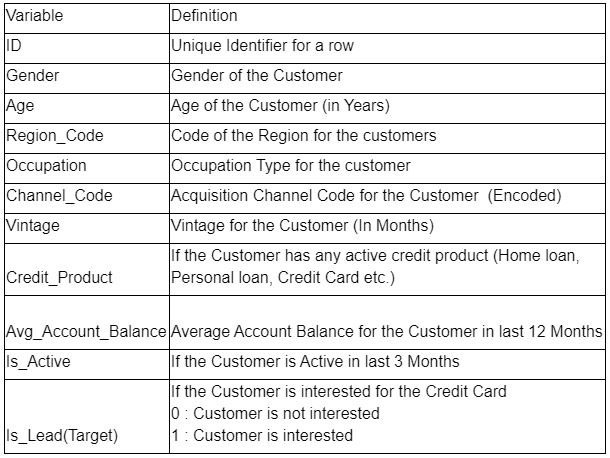

In [ ]:
import PIL                                          # to read images
from PIL import Image
## Display 
merge = Image.open('var.jpg')
merge

### Error Metric for checking Model Performance : ROC_AUC_SCORE



# 2. Importing required packages

In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import dtale                                        #importing dtale library for analysis of variables

import lux                                          #importing lux library to facilitate visualization for further analysis
lux.logger = True

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer                                # Knn Imputation function
from sklearn.preprocessing import StandardScaler, OneHotEncoder            
from sklearn.preprocessing import PowerTransformer                   # Power transformer for removing skewness and scaling
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew                                         # importing skew function
import category_encoders as ce                                       # importing target encoders
import statsmodels.api as sm

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from vecstack import stacking
import lightgbm as lgb

# 3. Loading  Data

In [ ]:
os.getcwd()    #Getting Current working directry

'C:\\Users\\Himanshu\\Documents\\Himanshu Projects\\Analytics_Vidhya'

In [ ]:
os.listdir(r'C:\\Users\\Himanshu\\Documents\\Himanshu Projects\\Analytics_Vidhya')   #list of sub folders in current directory

['.ipynb_checkpoints',
 '0-8732-roc-catboost-lgbm-xgb.ipynb',
 'av-hackathon-may2021-final-notebook.ipynb',
 'catboost_info',
 'CreditCard_Lead.ipynb',
 'c_l.ipynb',
 'final_submit.csv',
 'Himanshu_Rai',
 'Himanshu_Rai.zip',
 'job-a-thon-may-21.ipynb',
 'lgbm.csv',
 'lgbm1.csv',
 'logistic_balanced.csv',
 'Manjunatha_B_V_Analystics_vidya_hackathon.ipynb',
 'pred_test_cat.csv',
 'rf.csv',
 'rf1.csv',
 'rf2.csv',
 'sample_submission.csv',
 'submission1.csv',
 'submit_1.csv',
 'submit_LGBM.csv',
 'test.csv',
 'train.csv',
 'var.JPG']

In [ ]:
path = r'C:\\Users\\Himanshu\\Documents\\Himanshu Projects\\Analytics_Vidhya'   # Defining path

In [ ]:
#Loading merged data 

tdata = pd.read_csv("train.csv", na_values = ["?","#"," "])
tsdata = pd.read_csv("test.csv", na_values = ["?","#"," "])

In [ ]:
# Copying train and test data
train_data = tdata.copy()
test_data = tsdata.copy()

In [ ]:
# resetting the index
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# 4. Exploratory Data Analysis (EDA) - Understanding data

In [ ]:
train_data.head()  # Getting the glimpse of dataset

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
test_data.head()    # Getting the glimpse of dataset

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


###### Analysing Independent Attributes using dtale library

In [ ]:
dtale.show(train_data)             # Using Dtale function for analysing Independent attributes

In [ ]:
print(train_data.columns)          #column names

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')


In [ ]:
print(train_data.shape)               #dimensions of train_data
print(test_data.shape)                #dimensions of test_data

(245725, 11)
(105312, 10)


* __We have 245725 rows and 11 columns in Train set whereas Test set has 105312 rows and 10 columns.__

In [ ]:
train_data.info()                     # statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


* __Feature "Credit_Product" has Null Values.__

In [ ]:
train_data.describe(include='all') #Checking distribution of data wrt all columns

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,22AX9CWY,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


__Observation :__

 - This table gives the intuition  of all the features for further analysis.

In [ ]:
#categorical features
categorical = train_data.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train_data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


In [ ]:
train_data.corr()     # Checking Corelation between numerical features

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.631242,0.145232,0.230814
Vintage,0.631242,1.000000,0.167433,0.279642
Avg_Account_Balance,0.145232,0.167433,1.000000,0.053370
Is_Lead,0.230814,0.279642,0.053370,1.000000


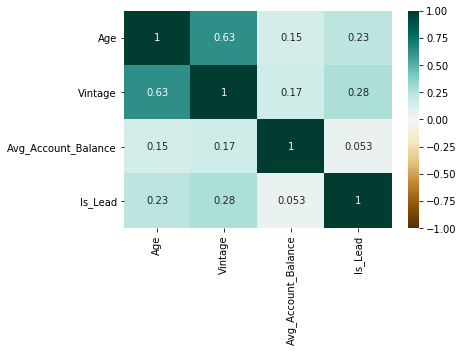

In [ ]:
# Visualizing correlation plot
sns.heatmap(train_data.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

### Analysing Target Variable

In [ ]:
print("The distribution of target classes is as below:")

train_data["Is_Lead"].value_counts()

The distribution of target classes is as below:


0    187437
1     58288
Name: Is_Lead, dtype: int64

In [ ]:
print("The percentage distribution target classes is as below:")

train_data["Is_Lead"].value_counts(1)

The percentage distribution target classes is as below:


0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

* __Target attribute has a class imbalance of ratio 76:24 (approx).__

In [ ]:
## Checking  percentage of null values for all features:

train_data.isnull().sum()/len(train_data)*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

* __Feature Credit_Product has 11.93% of Null Values must be imputed in later part after further analysis.__

# 5. Preprocessing

### Checking Datatypes & Typecasting obvious ones

In [ ]:
train_data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [ ]:
## Checking number of unique values for each attribute
train_data.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [ ]:
# Typecasting datatype to category based on number of unique values and domain knowledge

for col in ['ID','Gender','Region_Code','Occupation','Channel_Code',"Credit_Product","Is_Active","Is_Lead"]:
    train_data[col] = train_data[col].astype('category')
    
for col in ['ID','Gender','Region_Code','Occupation','Channel_Code',"Credit_Product","Is_Active"]:
    test_data[col] = test_data[col].astype('category')


In [ ]:
train_data.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                category
dtype: object

In [ ]:
test_data.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
dtype: object

### Checking duplicate rows

In [ ]:
# Select duplicate rows except first occurrence based on all columns  

duplicateRowsDF = train_data[train_data.duplicated()]

print("Duplicate Rows except first occurrence based on all columns are :")
#print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :


__Observation :__
* __No Duplicate rows present in Train_data__

### Checking duplicate columns

In [ ]:
## This function take a dataframe as a parameter and returning list of column names whose contents are duplicates.

def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
        # Iterate through all the columns of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in DataFrame from (x + 1)th index to last index
        for y in range(x + 1, df.shape[1]):
              
        # Take column at yth index.
            otherCol = df.iloc[:, y]
              
        # Check if two columns at x & y index are equal or not, if equal then adding to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
        # Return list of unique column names whose contents are duplicates.
    return list(duplicateColumnNames)

duplicateColNames = getDuplicateColumns(train_data)
print(duplicateColNames)

[]


 __- No duplicate columns present in the given data__

### Dropping Unnecessary features

In [ ]:
# Dropping columns with all unique values
train_data.drop(["ID"], axis = 1, inplace = True)      
test_data.drop(["ID"], axis = 1, inplace = True)

# 6. Chi Square Test

In [ ]:
from scipy.stats import chi2_contingency              # importing chi2_contigency
import statsmodels.api as sm

In [ ]:
cat_cols = train_data.select_dtypes('category').columns
cat_cols

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Is_Lead'],
      dtype='object')

In [ ]:
## Defining Function for Chi-square test

def find_chi2_independence(cat_col, target, df, alpha=0.05):
    data = df[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [ ]:
#Chi-Square Dependency test for Categorical Columns
for col in cat_cols:                                           
    find_chi2_independence(col, 'Is_Lead', train_data)

---------------Is_Lead Vs Gender Chi Square Test of Independence -------------------

 Contingency table :

[[88823 98614]
 [22705 35583]]

 Expected table :

[[ 85072.63703734 102364.36296266]
 [ 26455.36296266  31832.63703734]]
The p value returned = 1.949380935011988e-279 and degrees of freedom returned = 1
significance(alpha) = 0.050
Dependent (reject H0)
---------------Is_Lead Vs Region_Code Chi Square Test of Independence -------------------

 Contingency table :

[[ 2103  4569  3694  1377 21127  1549  2446  4931  1521  2085  2516  6351
   1465  2869  2410  1146  1358  1274 25161  6120  6606  1281  4097  3428
   4414  2702  1996  9851  1422  3079  9766  3979  4709 20531 13504]
 [  393  1381   592   481  5713   469   401  1170   430   501   594  1282
    323   818   383   400   220   223 10773  1743  1114   261  1155  1069
    872   543   768  2975   400   897  3009  1114  1120  8885  5816]]

 Expected table :

[[ 1903.92817988  4538.61084546  3269.32539221  1417.26705056
  20473.

### Observation

* __All categorical columns are dependent to target variable "Is_Lead"__

# 7. Visualization

In [ ]:
train_data.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Analysing Categorical Columns

In [ ]:
## Custom Function for Bar Plots

def barplot(column,df,x=6.4,y=4.8):
    plt.figure(figsize = (x, y))
    bar_plot1 = sns.countplot(x=column, data=df)
    
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

### Univariate Analysis on Categorical Columns
 __- For getting the distribution of all unique values in categorical features__

In [ ]:
train_data.head(1)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0


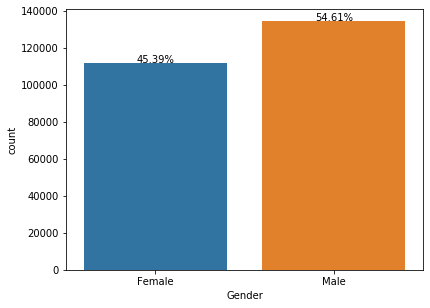

In [ ]:
barplot("Gender",train_data)

* __54% customers are male in a given bank__ 

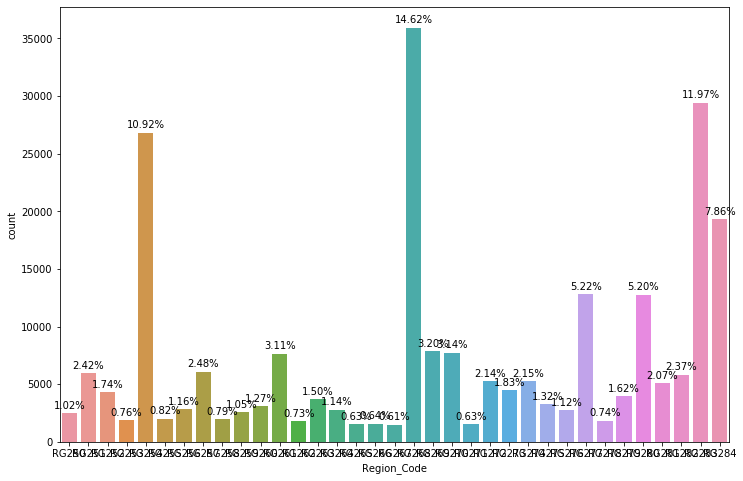

In [ ]:
barplot("Region_Code",train_data,x=12,y=8)

* __Region_code has uneven distributon for customer lead in a given bank__ 

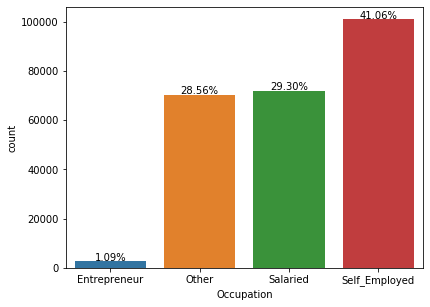

In [ ]:
barplot("Occupation",train_data)

* __Self_Employed customers are more whereas Entrepreneur customers are less in number......must be anlysed wrt target before binning__ 

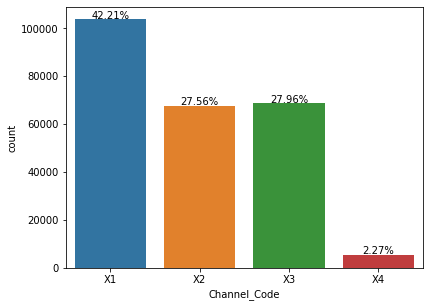

In [ ]:
barplot("Channel_Code",train_data)

* __Channel_Code of X1 are more whereas X4 are least in number......must be anlysed wrt target before binning__ 

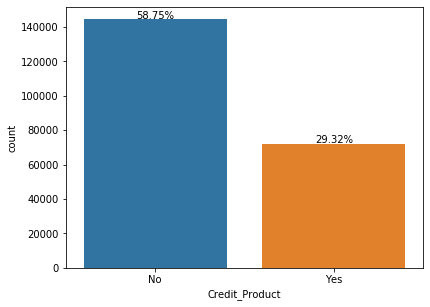

In [ ]:
barplot("Credit_Product",train_data)

* __Customers with active credit_product are less than inactive customers.__ 

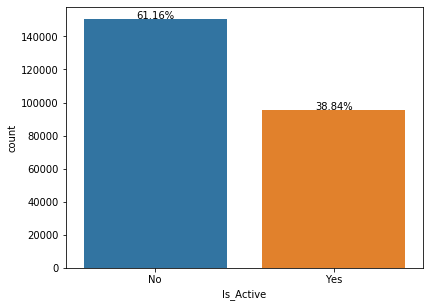

In [ ]:
barplot("Is_Active",train_data)

* __61% of customers are inactive in last three months.__

### Bivariate Analysis on categorical columns
 - __Getting the count of categorical unique values wrt Target feature__

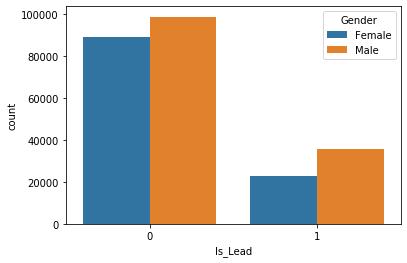

In [ ]:
# Visualizing the importance of variable wrt Is_Lead
train_data[train_data.Is_Lead == 1].Gender.value_counts(normalize=True)*100
sns.countplot(x='Is_Lead', hue = "Gender", data=train_data) 
plt.show()

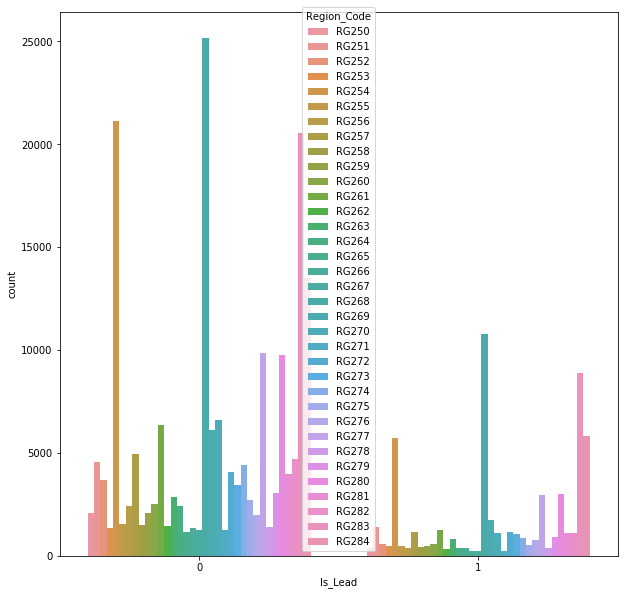

In [ ]:
# Visualizing the importance of variable wrt Is_Lead
train_data[train_data.Is_Lead == 1].Region_Code.value_counts(normalize=True)*100
plt.figure(figsize = (10,10))
sns.countplot(x='Is_Lead', hue = "Region_Code", data=train_data) 
plt.show()

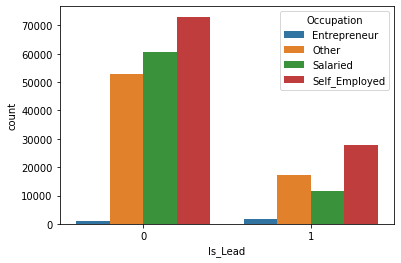

In [ ]:
# Visualizing the importance of variable wrt Is_Lead
train_data[train_data.Is_Lead == 1].Occupation.value_counts(normalize=True)*100
sns.countplot(x='Is_Lead', hue = "Occupation", data=train_data) 
plt.show()

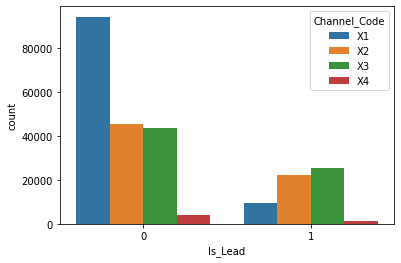

In [ ]:
# Visualizing the importance of variable wrt Is_Lead
train_data[train_data.Is_Lead == 1].Channel_Code.value_counts(normalize=True)*100
sns.countplot(x='Is_Lead', hue = "Channel_Code", data=train_data) 
plt.show()

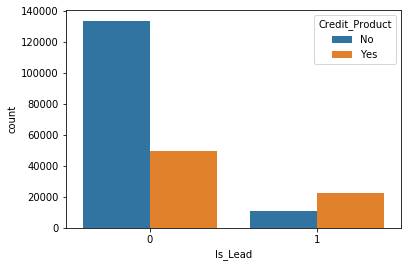

In [ ]:
# Visualizing the importance of variable wrt Is_Lead
train_data[train_data.Is_Lead == 1].Credit_Product.value_counts(normalize=True)*100
sns.countplot(x='Is_Lead', hue = "Credit_Product", data=train_data) 
plt.show()

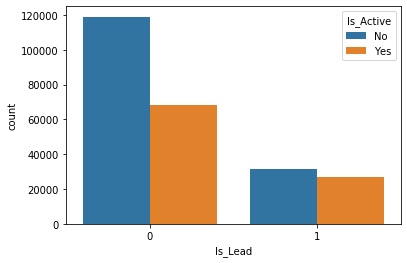

In [ ]:
# Visualizing the importance of variable wrt Is_Lead
train_data[train_data.Is_Lead == 1].Is_Active.value_counts(normalize=True)*100
sns.countplot(x='Is_Lead', hue = "Is_Active", data=train_data) 
plt.show()

#### OBSERVATION:
* __All categorical varibles seem to be good predictor for target as of now.....Lets check the Probability of Customer Lead before doing any binning operation.__

### Probabilistic Analysis of Categorical columns wrt Customer Lead

In [ ]:
## Custom Function for Customer_Lead Probability on categorical columns

def probStatusCategorical(col_list):
    rows = []
    for item in col_list:
        for level in train_data[item].unique():
            row = {'Condition': item}
            ## Finding count of rows with that level in categorical column
            total = len(train_data[train_data[item] == level])
            ## Finding count of rows where level and "1" in Customer_Lead match
            n = len(train_data[(train_data[item] == level) & (train_data['Is_Lead'] == 1)])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

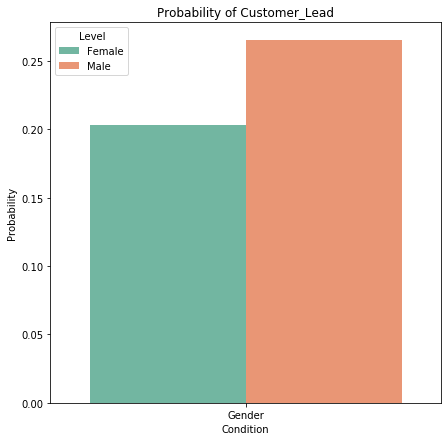

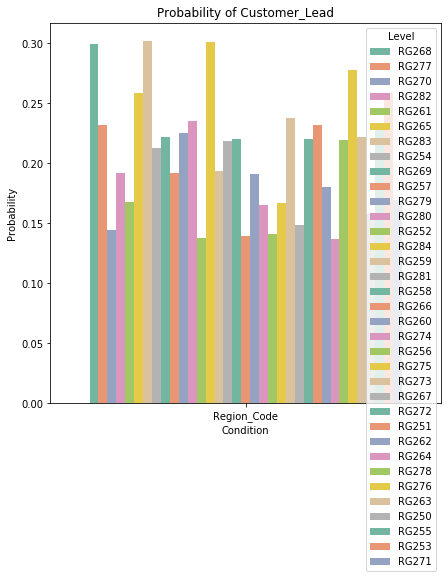

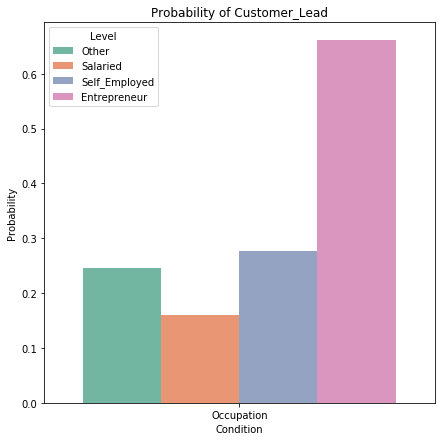

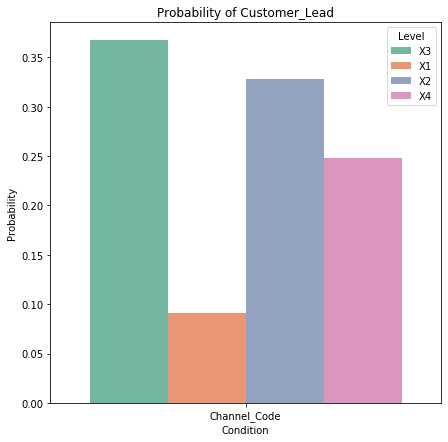

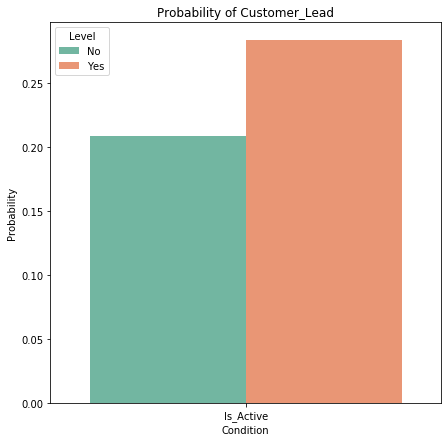

In [ ]:
## Probability of Customer_Lead wrt Gender
cat = train_data[['Gender', 'Region_Code', 'Occupation', 'Channel_Code','Is_Active']]
for col in cat:
    plt.figure(figsize=(7,7))
    sns.barplot(data = probStatusCategorical([col]),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')
    plt.title('Probability of Customer_Lead')
    plt.ylabel('Probability')
    plt.show()

#### OBSERVATION:
* __Doesn't require any binning operation as each feature values are influencing the Customer_Lead (Target).__

## Analysing Numerical Columns

In [ ]:
num_cols = train_data.select_dtypes("int64").columns

### Distribution Of numerical Features

In [ ]:
### Function for displaying Histogram Plot
    
def hist(data, column):
    plt.figure(figsize=(10, 5))
    plt.hist(data[column])
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title("Distribution Plot")

    plt.show()
   

#### Checking the the distribution of all numerical columns

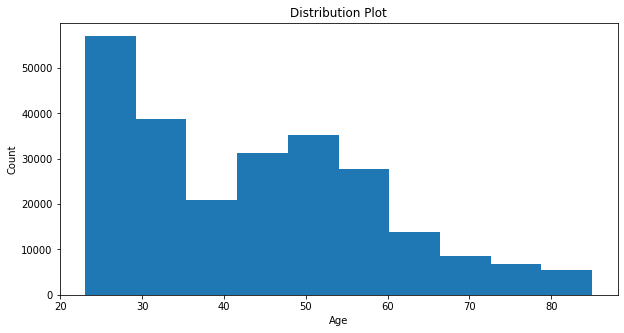

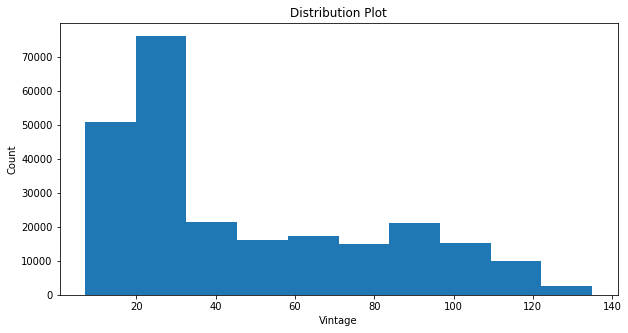

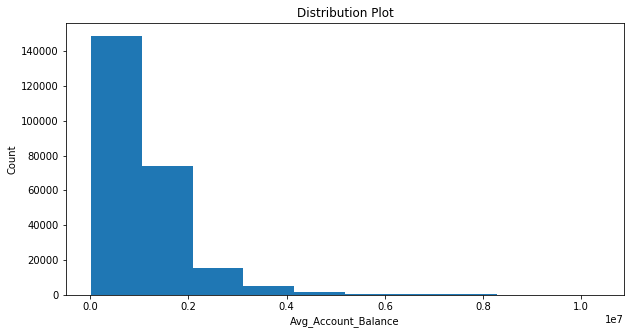

In [ ]:
for col in num_cols:
    hist(train_data,col)

* __All numerical features are right skewed.__

### Skewness Value with Distplots

In [ ]:
num = train_data.select_dtypes('int64')

Age
0.6189884489476856


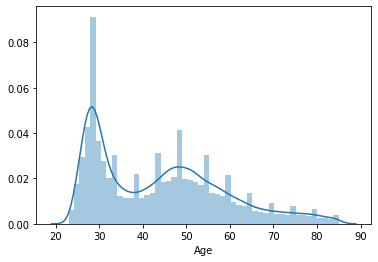

Vintage
0.7901837484945031


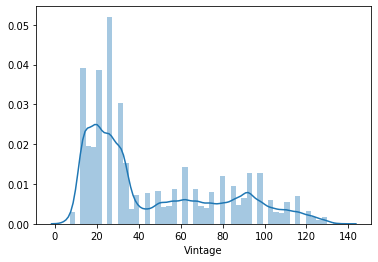

Avg_Account_Balance
2.9687083932770477


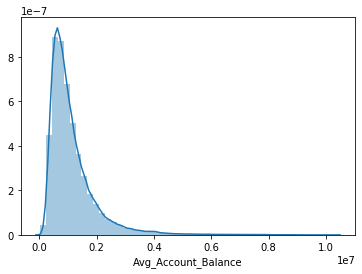

In [ ]:
for col in num:
    print(col)
    print(skew(num[col]))
    
    plt.figure()
    sns.distplot(num[col])
    plt.show()

* __Avg Account_balance is highly skewed...we need to bring all variables to Normal Distribution.__ 

## Checking Outliers with Boxplot

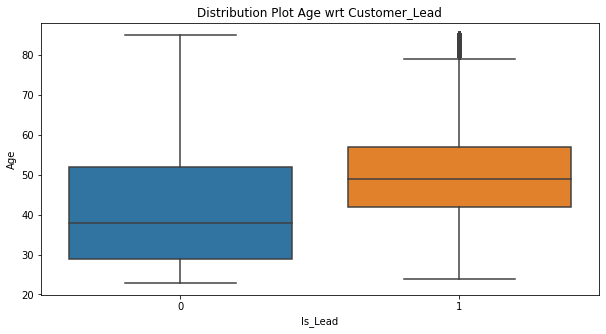

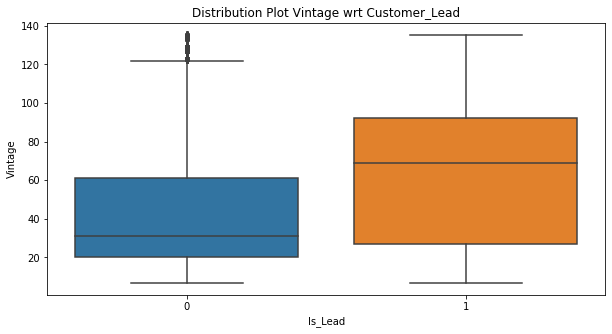

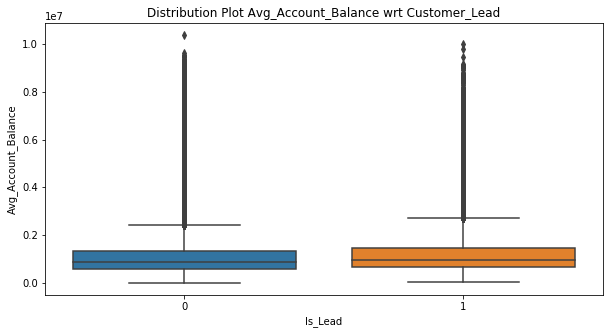

In [ ]:
### Loop displaying Box Plot for all numerical columns wrt Customer_Lead status 
    
for col in num_cols:
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(data = train_data, y = col, x = "Is_Lead")
    plt.xlabel("Is_Lead")
    plt.ylabel(col)
    plt.title("Distribution Plot" + " " + col + " " + "wrt Customer_Lead")

    plt.show()
    
   

* __Avg Account_balance has high number of outliers. We need to remove outliers as they may change the prediction function.__ 

### Outliers

In [ ]:
##Removing Outliers
data = train_data.copy()
#for x in num_cols:
median = train_data["Avg_Account_Balance"].median()
std = train_data["Avg_Account_Balance"].std()
outliers = (train_data["Avg_Account_Balance"] - median).abs() > 1.5*std
train_data.loc[outliers,"Avg_Account_Balance"] = np.nan
train_data["Avg_Account_Balance"].fillna(median, inplace=True)

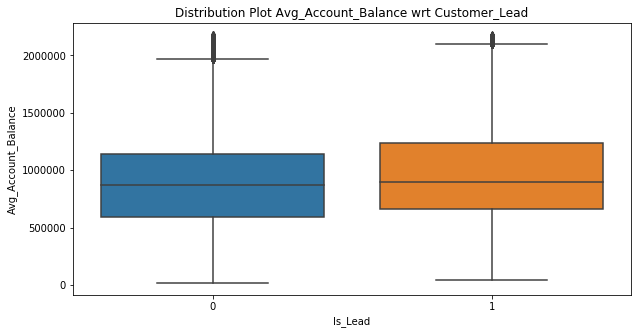

In [ ]:
## After removing outliers again checking for distribution    
plt.figure(figsize=(10, 5))
sns.boxplot(data = train_data, y = "Avg_Account_Balance" , x = "Is_Lead")
plt.xlabel("Is_Lead")
plt.ylabel(col)
plt.title("Distribution Plot" + " " + col + " " + "wrt Customer_Lead")
plt.show()

* __Most of the outliers are removed....remaining outliers will get removed after Normal Distribution.__

In [ ]:
train_data["Avg_Account_Balance"].isnull().sum()

0

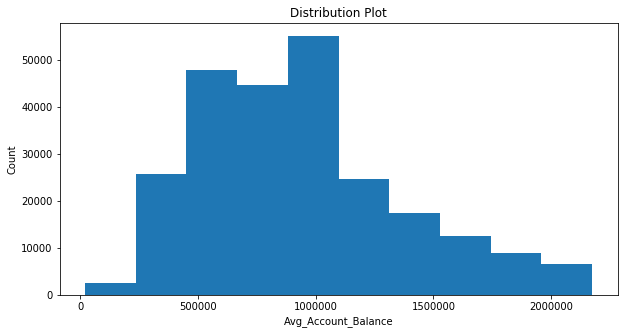

In [ ]:
hist(train_data,"Avg_Account_Balance")

### Analysing Numerical Features wrt Target variable

In [ ]:
## Custom Function for Customer_Lead Probability on numerical columns

def getProbOfLead(col, target, df, forGraph=True):
    crosstab = pd.crosstab(index = df[col], columns = df[target])
    crosstab.columns = pd.Index(list(crosstab.columns))
    crosstab = crosstab.reset_index() 
    crosstab['TotalCount'] = crosstab[1] + crosstab[0]
    crosstab['ProbOfLead'] = crosstab[1] / crosstab['TotalCount']
    
    print(crosstab.head())
    if forGraph:
        return crosstab[[col, 'ProbOfLead']]
    else:
        return crosstab[[col, 'TotalCount', 'ProbOfLead']]

In [ ]:
data = getProbOfLead('Age', 'Is_Lead', train_data)

   Age      0    1  TotalCount  ProbOfLead
0   23      1    0           1    0.000000
1   24   1794  111        1905    0.058268
2   25   4940  367        5307    0.069154
3   26   8448  591        9039    0.065383
4   27  12183  822       13005    0.063206


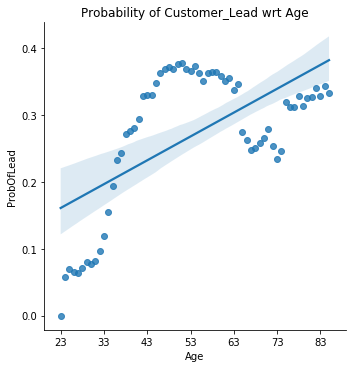

In [ ]:
sns.lmplot(data = data, x = 'Age', y = 'ProbOfLead', fit_reg = True)
plt.xticks(np.arange(np.min(train_data['Age']), np.max(train_data['Age']), 10))
plt.title('Probability of Customer_Lead wrt Age')
plt.show()

In [ ]:
data = getProbOfLead('Vintage', 'Is_Lead', train_data)

   Vintage      0     1  TotalCount  ProbOfLead
0        7    501   147         648    0.226852
1        8    484   135         619    0.218094
2        9    490   148         638    0.231975
3       13  10499  1839       12338    0.149052
4       14  10463  1804       12267    0.147061


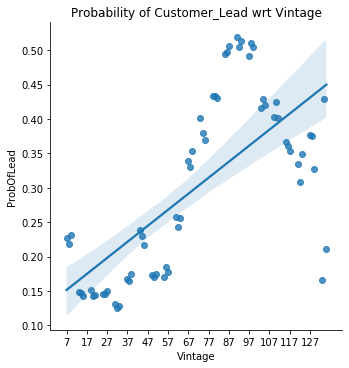

In [ ]:
sns.lmplot(data = data, x = 'Vintage', y = 'ProbOfLead', fit_reg = True)
plt.xticks(np.arange(np.min(train_data['Vintage']), np.max(train_data['Vintage']), 10))
plt.title('Probability of Customer_Lead wrt Vintage')
plt.show()

* __Probability of being a Customer as a lead for all Numerical Features wrt Target Feature__

## Visualization Of Target Attribute

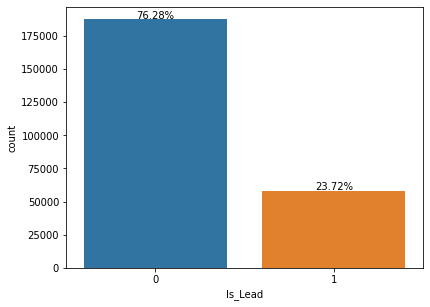

In [ ]:
barplot("Is_Lead",train_data)    #barplot for checking the distribution

__Observation__ 

- Is_Lead has class imbalance of ratio 76:24 (approx)

# 8. Split the data into train and validation

In [ ]:
y = train_data["Is_Lead"]                     #Getting target attribute
X = train_data.drop('Is_Lead', axis=1)        #Getting Independent Variables
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 123, stratify = y)

In [ ]:
## Getting the shape of train and validation

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(184293, 9)
(61432, 9)
(184293,)
(61432,)


## Split the attributes into numerical and categorical types

In [ ]:
num_attr=X_train.select_dtypes(['int64','float64']).columns   #Saving Numerical columns
num_attr

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

In [ ]:
cat_attr = X_train.select_dtypes('category').columns     # Saving Categorical columns
cat_attr

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

# 9. Preparation for Model buillding

## Checking and Imputing Missing Values

In [ ]:
print(X_train.isnull().sum())            #Checking null values

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         21991
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


In [ ]:
print(X_val.isnull().sum())

Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product         7334
Avg_Account_Balance       0
Is_Active                 0
dtype: int64


In [ ]:
X_train["Credit_Product"].value_counts()

No     108149
Yes     54153
Name: Credit_Product, dtype: int64

* __Since "Credit_Product" is a categorical feature.....we can use mode for imputing the missing values__

In [ ]:
# Imputing Null values in Categorical columns

imputer = SimpleImputer(strategy='most_frequent')   
imputer = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer.transform(X_train[cat_attr])
X_val[cat_attr] = imputer.transform(X_val[cat_attr])

In [ ]:
print(test_data.isnull().sum())    #Checking null values in test_data

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


In [ ]:
## Imputing missing values in test data (Categorical Column)
imputer = SimpleImputer(strategy='most_frequent')   
imputer = imputer.fit(test_data[cat_attr])
test_data[cat_attr] = imputer.transform(test_data[cat_attr])

In [ ]:
print(X_train.isnull().sum())

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64


In [ ]:
print(test_data.isnull().sum())

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64


__Observation:__

 __- All null values present in train and test are imputed.__

# Multicollinearity 

#### Standardizing the numerical variables

In [ ]:
X_train1 = X_train.copy()
scaler = StandardScaler()
scaler.fit(X_train1[num_attr])

#Standardising train num columns to check multicollinearity after standardizing
X_train_num = pd.DataFrame(scaler.transform(X_train1[num_attr]), columns=num_attr)

## Checking MultiCollinearity

In [ ]:
## Checkig the multicollinearity after standardization
X_train_num.corr()

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.630399,0.152197
Vintage,0.630399,1.000000,0.173424
Avg_Account_Balance,0.152197,0.173424,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_num[num_attr].values, i) for i in range(X_train_num[num_attr].shape[1])]
vif["features"] = X_train_num[num_attr].columns
vif

,VIF Factor,features
0,1.664719,Age
1,1.676582,Vintage
2,1.034261,Avg_Account_Balance


* __There is no multicollinearity between features__

In [ ]:
test_data.dtypes

Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [ ]:
for col in ['Gender','Region_Code','Occupation','Channel_Code',"Credit_Product","Is_Active"]:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    test_data[col] = test_data[col].astype('category')

In [ ]:
test_data.dtypes

Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
dtype: object

## Categorical Encoding :
   __- Label Encoding and Frequency Encoding__

In [ ]:
X_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
217107,Female,31,RG252,Salaried,X1,33,No,398008.0,No
73153,Female,32,RG263,Salaried,X1,20,No,586883.0,No
194572,Female,27,RG250,Salaried,X1,14,Yes,327333.0,No
121117,Male,29,RG256,Salaried,X1,27,No,594333.0,No
96024,Female,70,RG283,Other,X1,13,Yes,894601.0,No


#### Label Encoding of Gender, Credit_Product and Is_Active Columns

In [ ]:
le = LabelEncoder()
le.fit(X_train["Gender"])
X_train["Gender"] = le.transform(X_train["Gender"])
X_val["Gender"] = le.transform(X_val["Gender"])
test_data["Gender"] = le.transform(test_data["Gender"])

In [ ]:
le1 = LabelEncoder()
le1.fit(X_train["Credit_Product"])
X_train["Credit_Product"] = le1.transform(X_train["Credit_Product"])
X_val["Credit_Product"] = le1.transform(X_val["Credit_Product"])
test_data["Credit_Product"] = le1.transform(test_data["Credit_Product"])

In [ ]:
le2 = LabelEncoder()
le2.fit(X_train["Is_Active"])
X_train["Is_Active"] = le2.transform(X_train["Is_Active"])
X_val["Is_Active"] = le2.transform(X_val["Is_Active"])
test_data["Is_Active"] = le2.transform(test_data["Is_Active"])

#### Frequency Encoding of Region_Code Column 

In [ ]:
X_train["Region_Code"].value_counts()

RG268    26858
RG283    22057
RG254    20138
RG284    14433
RG277     9612
RG280     9572
RG269     5986
RG270     5783
RG261     5731
RG257     4576
RG251     4431
RG282     4366
RG272     3966
RG274     3954
RG281     3824
RG273     3368
RG252     3244
RG279     2939
RG263     2743
RG275     2427
RG260     2371
RG256     2171
RG276     2098
RG264     2089
RG259     1946
RG250     1882
RG255     1507
RG258     1457
RG262     1381
RG253     1371
RG278     1367
RG266     1176
RG271     1168
RG265     1152
RG267     1149
Name: Region_Code, dtype: int64

In [ ]:
reg_dict = X_train["Region_Code"].value_counts(normalize =True).to_dict()
X_train["Region_Code"] = X_train["Region_Code"].map(reg_dict)
X_val["Region_Code"] = X_val["Region_Code"].map(reg_dict)

reg_dict1 = test_data["Region_Code"].value_counts(normalize =True).to_dict()
test_data["Region_Code"] = test_data["Region_Code"].map(reg_dict)

#### Converting features to required datatypes

In [ ]:
X_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
217107,0,31,0.017602,Salaried,X1,33,0,398008.0,0
73153,0,32,0.014884,Salaried,X1,20,0,586883.0,0
194572,0,27,0.010212,Salaried,X1,14,1,327333.0,0
121117,1,29,0.011780,Salaried,X1,27,0,594333.0,0
96024,0,70,0.119684,Other,X1,13,1,894601.0,0


In [ ]:
X_train["Region_Code"] = X_train["Region_Code"].astype("float64")
X_val["Region_Code"] = X_val["Region_Code"].astype("float64")
test_data["Region_Code"] = test_data["Region_Code"].astype("float64")

In [ ]:
num_attr = X_train.select_dtypes(['int64','float64',"int32"]).columns   #Saving Numerical columns
num_attr

Index(['Gender', 'Age', 'Region_Code', 'Vintage', 'Credit_Product',
       'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [ ]:
cat_attr = X_train.select_dtypes('category').columns     # Saving Categorical columns
cat_attr

Index(['Occupation', 'Channel_Code'], dtype='object')

## Initiating Pipeline 

#### Standardizing and One-hot encoding Categorical attributes 

##### Using PowerTransformer to remove skewness as well as standardizing the variables at the same time

In [ ]:
# DataFrameMapper, a class for mapping pandas data frame columns to different sklearn transformations
mapper = DataFrameMapper(
  [([continuous_col], PowerTransformer(method = 'yeo-johnson',standardize=True)) for continuous_col in num_attr]  + 
    [([categorical_col], OneHotEncoder(handle_unknown='ignore')) for categorical_col in cat_attr]
, df_out=True)

In [ ]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [ ]:
mapper.fit(X_train)

X_train = mapper.transform(X_train)
X_val = mapper.transform(X_val)
test_data = mapper.transform(test_data)

2021-05-31 19:41:18,626 - INFO     - [FIT] ['Gender']: 0.37358 secs
2021-05-31 19:41:19,059 - INFO     - [FIT] ['Age']: 0.432976 secs
2021-05-31 19:41:19,656 - INFO     - [FIT] ['Region_Code']: 0.596007 secs
2021-05-31 19:41:20,182 - INFO     - [FIT] ['Vintage']: 0.524989 secs
2021-05-31 19:41:20,469 - INFO     - [FIT] ['Credit_Product']: 0.285994 secs
2021-05-31 19:41:21,053 - INFO     - [FIT] ['Avg_Account_Balance']: 0.581998 secs
2021-05-31 19:41:21,354 - INFO     - [FIT] ['Is_Active']: 0.298517 secs
2021-05-31 19:41:21,366 - INFO     - [FIT] ['Occupation']: 0.012044 secs
2021-05-31 19:41:21,390 - INFO     - [FIT] ['Channel_Code']: 0.023046 secs
2021-05-31 19:41:21,406 - INFO     - [TRANSFORM] ['Gender']: 0.013007 secs
2021-05-31 19:41:21,425 - INFO     - [TRANSFORM] ['Age']: 0.016042 secs
2021-05-31 19:41:21,443 - INFO     - [TRANSFORM] ['Region_Code']: 0.01601 secs
2021-05-31 19:41:21,463 - INFO     - [TRANSFORM] ['Vintage']: 0.016044 secs
2021-05-31 19:41:21,477 - INFO     - [TRA

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(test_data.shape)

(184293, 15)
(61432, 15)
(105312, 15)


* __Train , validation and Test data has 15 columns after categorical encoding and standardization for Model Building.__

# Classification report

In [ ]:
def get_CR_CM(train_actual,train_predicted,test_actual,test_predicted):
    print('''
         ========================================
           CLASSIFICATION REPORT FOR TRAIN DATA
         ========================================
        ''')
    print(classification_report(train_actual, train_predicted, digits=4))

    print('''
             =============================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
             =============================================
            ''')
    print(classification_report(test_actual, test_predicted, digits=4))

    print('''
             ========================================
               Confusion Matrix FOR TRAIN DATA
             ========================================
            ''')
    print(confusion_matrix(train_actual, train_predicted))

    print('''
             =============================================
               Confusion matrix FOR VALIDATION DATA
             =============================================
            ''')
    print(confusion_matrix(test_actual, test_predicted))
    

## Function to calculate accuracy, recall, precision and F1 score# 

In [ ]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score','Train_roc','Val_roc'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    get_CR_CM(train_actual,train_predicted,test_actual,test_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
    train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    train_roc = roc_auc_score(train_actual,train_predicted)
    val_roc = roc_auc_score(test_actual,test_predicted)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score,train_roc,val_roc],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

#  10. MODEL BUILDING

### 1. Logistic Regression

In [ ]:
log_mod = LogisticRegression(random_state=123)

In [ ]:
log_mod.fit(X_train, y_train)

LogisticRegression(random_state=123)

In [ ]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

##### Evaluating the model performance

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.7806    0.9914    0.8734    140577
           1     0.7890    0.1038    0.1834     43716

    accuracy                         0.7808    184293
   macro avg     0.7848    0.5476    0.5284    184293
weighted avg     0.7826    0.7808    0.7098    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.7810    0.9916    0.8738     46860
           1     0.7959    0.1057    0.1866     14572

    accuracy                         0.7814     61432
   macro avg     0.7884    0.5486    0.5302     61432
weighted avg     0.7845    0.7814    0.7108     61432


               Confusion Matrix FOR TRAIN DATA
            
[[139364   1213]
 [ 39179   4537]]

               Confusion matrix FOR VALIDATION DATA
            
[[46465   395]
 [13032  1540]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626


In [ ]:
#y_pred_test = log_mod.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("logistic.csv")

### Handling Imbalanced Data

### 2. Logistic Regression with class_weight='balanced'

In [ ]:
log_mod = LogisticRegression(class_weight='balanced', random_state=123)

In [ ]:
log_mod.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [ ]:
y_pred_train = log_mod.predict(X_train)
y_pred_val = log_mod.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression_Balanced",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8838    0.5744    0.6962    140577
           1     0.3561    0.7571    0.4844     43716

    accuracy                         0.6177    184293
   macro avg     0.6199    0.6657    0.5903    184293
weighted avg     0.7586    0.6177    0.6460    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8831    0.5722    0.6944     46860
           1     0.3547    0.7563    0.4830     14572

    accuracy                         0.6159     61432
   macro avg     0.6189    0.6643    0.5887     61432
weighted avg     0.7577    0.6159    0.6443     61432


               Confusion Matrix FOR TRAIN DATA
            
[[80743 59834]
 [10620 33096]]

               Confusion matrix FOR VALIDATION DATA
            
[[26814 20046]
 [ 3551 11021]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626
1,LogisticRegression_Balanced,0.617707,0.757068,0.356139,0.484405,0.615884,0.756313,0.354749,0.482964,0.665718,0.664264


In [ ]:
y_pred_test = log_mod.predict(test_data)
df = pd.DataFrame(y_pred_test)
df.to_csv("logistic_balanced.csv")



# ROC AUC Curve

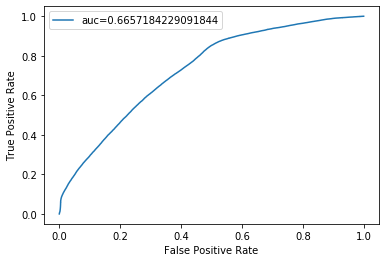

In [ ]:
y_pred_train_prob = log_mod.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 1)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 3. Lasso for Variable Selection

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=123)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=123))

In [ ]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True, False, False, False])

In [ ]:

# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 15
selected features: 8


In [ ]:
X_train = X_train[selected_feat]
X_val = X_val[selected_feat]
test_data = test_data[selected_feat]

In [ ]:
X_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_x0_Salaried,Channel_Code_x0_X1
217107,-1.096039,-0.867036,-0.122406,-0.645069,-1.437424,-0.794545,1.0,1.0
73153,-1.096039,-0.764235,-0.860405,-0.645069,-0.750146,-0.794545,1.0,1.0
194572,-1.096039,-1.324012,-1.403418,1.550223,-1.755173,-0.794545,1.0,1.0
121117,0.912376,-1.085675,-0.414319,-0.645069,-0.726498,-0.794545,1.0,1.0
96024,-1.096039,1.518575,-1.517680,1.550223,0.088973,-0.794545,0.0,1.0


### LASSO Model

In [ ]:
clf_logreg = LogisticRegression(penalty='l1', solver='liblinear',class_weight ='balanced')

In [ ]:
clf_logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [ ]:
y_pred_train = clf_logreg.predict(X_train)
y_pred_val = clf_logreg.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Lasso",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8837    0.5729    0.6952    140577
           1     0.3555    0.7575    0.4839     43716

    accuracy                         0.6167    184293
   macro avg     0.6196    0.6652    0.5895    184293
weighted avg     0.7584    0.6167    0.6450    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8826    0.5709    0.6934     46860
           1     0.3539    0.7558    0.4821     14572

    accuracy                         0.6148     61432
   macro avg     0.6183    0.6634    0.5877     61432
weighted avg     0.7572    0.6148    0.6432     61432


               Confusion Matrix FOR TRAIN DATA
            
[[80542 60035]
 [10602 33114]]

               Confusion matrix FOR VALIDATION DATA
            
[[26754 20106]
 [ 3558 11014]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626
1,LogisticRegression_Balanced,0.617707,0.757068,0.356139,0.484405,0.615884,0.756313,0.354749,0.482964,0.665718,0.664264
2,Lasso,0.616714,0.757480,0.355495,0.483893,0.614794,0.755833,0.353920,0.482098,0.665209,0.663384


### 4. Decision Tree Classifier

In [ ]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=123,max_depth =7)

# Train Decision Tree Classifer
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=123)

In [ ]:
y_pred_train = clf_dt.predict(X_train)
y_pred_val = clf_dt.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8941    0.6933    0.7810    140577
           1     0.4273    0.7358    0.5407     43716

    accuracy                         0.7034    184293
   macro avg     0.6607    0.7146    0.6608    184293
weighted avg     0.7833    0.7034    0.7240    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8928    0.6911    0.7791     46860
           1     0.4247    0.7333    0.5379     14572

    accuracy                         0.7011     61432
   macro avg     0.6588    0.7122    0.6585     61432
weighted avg     0.7818    0.7011    0.7219     61432


               Confusion Matrix FOR TRAIN DATA
            
[[97465 43112]
 [11548 32168]]

               Confusion matrix FOR VALIDATION DATA
            
[[32386 14474]
 [ 3887 10685]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626
1,LogisticRegression_Balanced,0.617707,0.757068,0.356139,0.484405,0.615884,0.756313,0.354749,0.482964,0.665718,0.664264
2,Lasso,0.616714,0.757480,0.355495,0.483893,0.614794,0.755833,0.353920,0.482098,0.665209,0.663384
3,DecisionTree,0.583223,0.837840,0.344410,0.488155,0.578819,0.835781,0.341531,0.484910,0.670942,0.667346
4,DecisionTree_BestParameters,0.581194,0.863071,0.346379,0.494356,0.577224,0.861515,0.343870,0.491543,0.678304,0.675166
5,Random Forest,0.698703,0.750435,0.423724,0.541626,0.695354,0.746775,0.420041,0.537662,0.716525,0.713069
6,Random Forest imp,0.710646,0.731105,0.434654,0.545186,0.707677,0.728932,0.431263,0.541911,0.717694,0.715000
7,DecisionTree,0.703407,0.735840,0.427311,0.540657,0.701117,0.733256,0.424699,0.537867,0.714581,0.712189


# Check important features

### Feature Importances

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

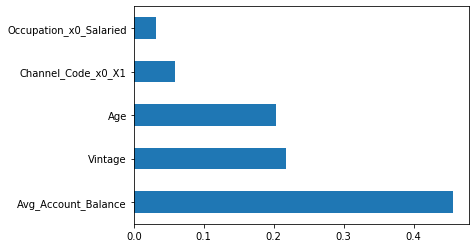

In [ ]:
ranked_features = pd.Series(model.feature_importances_,index = X_train.columns)
#plt.figure(figsize= (10,10))
ranked_features.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
r=ranked_features.nlargest(5)
r

Avg_Account_Balance       0.455911
Vintage                   0.217709
Age                       0.203375
Channel_Code_x0_X1        0.059501
Occupation_x0_Salaried    0.031740
dtype: float64

### 4. Decision Tree with Grid-Search CV - Hyper-parameter Tuning

In [ ]:
# set of parameters to test
param_grid = {"max_depth": [3,4,5,6,8],
              "min_samples_leaf": [2, 3, 4],
               "max_leaf_nodes": [2,4,8],
              "ccp_alpha" : [0.005,0.01,0.05,0.1]
              }

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=123,class_weight = "balanced")
clf_dt_grid = GridSearchCV(dt, param_grid,cv=3,scoring='roc_auc',verbose =True)
clf_dt_grid.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  2.0min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             param_grid={'ccp_alpha': [0.005, 0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6, 8],
                         'max_leaf_nodes': [2, 4, 8],
                         'min_samples_leaf': [2, 3, 4]},
             scoring='roc_auc', verbose=True)

In [ ]:
clf_dt_grid.best_params_

{'ccp_alpha': 0.005,
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 2}

In [ ]:
y_pred_train = clf_dt_grid.predict(X_train)
y_pred_val = clf_dt_grid.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree_BestParameters",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.9206    0.4935    0.6426    140577
           1     0.3464    0.8631    0.4944     43716

    accuracy                         0.5812    184293
   macro avg     0.6335    0.6783    0.5685    184293
weighted avg     0.7844    0.5812    0.6074    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.9190    0.4888    0.6382     46860
           1     0.3439    0.8615    0.4915     14572

    accuracy                         0.5772     61432
   macro avg     0.6315    0.6752    0.5649     61432
weighted avg     0.7826    0.5772    0.6034     61432


               Confusion Matrix FOR TRAIN DATA
            
[[69380 71197]
 [ 5986 37730]]

               Confusion matrix FOR VALIDATION DATA
            
[[22906 23954]
 [ 2018 12554]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626
1,LogisticRegression_Balanced,0.617707,0.757068,0.356139,0.484405,0.615884,0.756313,0.354749,0.482964,0.665718,0.664264
2,Lasso,0.616714,0.757480,0.355495,0.483893,0.614794,0.755833,0.353920,0.482098,0.665209,0.663384
3,DecisionTree,0.583223,0.837840,0.344410,0.488155,0.578819,0.835781,0.341531,0.484910,0.670942,0.667346
4,DecisionTree_BestParameters,0.581194,0.863071,0.346379,0.494356,0.577224,0.861515,0.343870,0.491543,0.678304,0.675166


# Max_depth

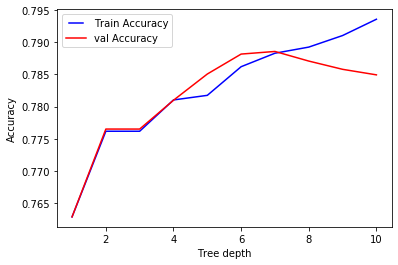

In [ ]:
max_depths = np.linspace(1, 10, 10, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

## 5. Random Forest

In [ ]:
Randomforest_model = RandomForestClassifier(n_estimators=400, max_depth=8, min_samples_leaf=2, max_features = 5,random_state = 2, class_weight =  "balanced")

In [ ]:
Randomforest_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=5,
                       min_samples_leaf=2, n_estimators=400, random_state=2)

In [ ]:
y_pred_train = Randomforest_model.predict(X_train)
y_pred_val = Randomforest_model.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest imp",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8939    0.7052    0.7884    140577
           1     0.4353    0.7308    0.5456     43716

    accuracy                         0.7112    184293
   macro avg     0.6646    0.7180    0.6670    184293
weighted avg     0.7851    0.7112    0.7308    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8925    0.7017    0.7857     46860
           1     0.4316    0.7283    0.5420     14572

    accuracy                         0.7080     61432
   macro avg     0.6620    0.7150    0.6638     61432
weighted avg     0.7832    0.7080    0.7279     61432


               Confusion Matrix FOR TRAIN DATA
            
[[99129 41448]
 [11770 31946]]

               Confusion matrix FOR VALIDATION DATA
            
[[32881 13979]
 [ 3959 10613]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626
1,LogisticRegression_Balanced,0.617707,0.757068,0.356139,0.484405,0.615884,0.756313,0.354749,0.482964,0.665718,0.664264
2,Lasso,0.616714,0.757480,0.355495,0.483893,0.614794,0.755833,0.353920,0.482098,0.665209,0.663384
3,DecisionTree,0.583223,0.837840,0.344410,0.488155,0.578819,0.835781,0.341531,0.484910,0.670942,0.667346
4,DecisionTree_BestParameters,0.581194,0.863071,0.346379,0.494356,0.577224,0.861515,0.343870,0.491543,0.678304,0.675166
5,Random Forest,0.698703,0.750435,0.423724,0.541626,0.695354,0.746775,0.420041,0.537662,0.716525,0.713069
6,Random Forest imp,0.710646,0.731105,0.434654,0.545186,0.707677,0.728932,0.431263,0.541911,0.717694,0.715000
7,DecisionTree,0.703407,0.735840,0.427311,0.540657,0.701117,0.733256,0.424699,0.537867,0.714581,0.712189
8,Random Forest imp,0.669836,0.765372,0.398089,0.523758,0.668316,0.766607,0.396895,0.523011,0.702749,0.702179
9,Random Forest imp,0.670736,0.779852,0.400381,0.529112,0.669277,0.780469,0.399179,0.528203,0.708328,0.707584


### Check important features

In [ ]:
importances = Randomforest_model.feature_importances_

In [ ]:
features = X_train.columns
importances = Randomforest_model.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7
0,Channel_Code_x0_X1,Age,Vintage,Occupation_x0_Salaried,Is_Active,Credit_Product,Avg_Account_Balance,Gender
1,0.373937,0.229517,0.214137,0.0842285,0.0402151,0.039299,0.0166016,0.00206567


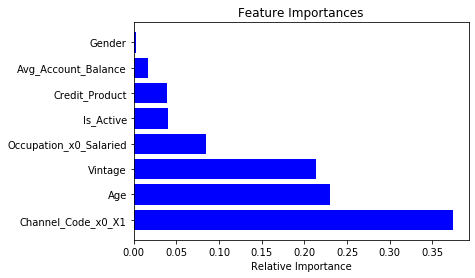

In [ ]:
%matplotlib inline
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Max_depth

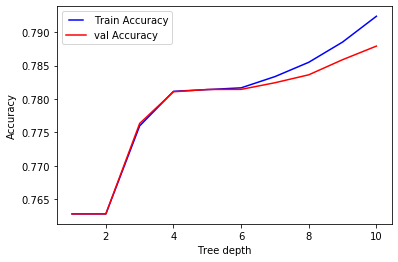

In [ ]:
max_depths = np.linspace(1, 10, 10, endpoint=True)

train_results = []
val_results = []

for max_depth in max_depths:
    dt = RandomForestClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)
    
    val_pred = dt.predict(X_val)
    confusion_matrix_val = confusion_matrix(y_val, val_pred)
    Accuracy_val=(confusion_matrix_val[0,0]+confusion_matrix_val[1,1])/(confusion_matrix_val[0,0]+confusion_matrix_val[0,1]+confusion_matrix_val[1,0]+confusion_matrix_val[1,1])
    val_results.append(Accuracy_val)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, val_results,'r', label='val Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()



### ROC AUC Curve

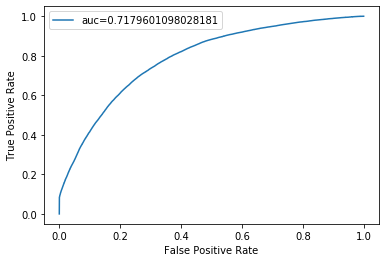

In [ ]:
y_pred_train_prob = Randomforest_model.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, y_pred_train_prob, pos_label = 1)
auc = roc_auc_score(y_train, y_pred_train)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Hyper-parameter tuning using Grid Search and Cross Validation

In [ ]:
param_grid = {"n_estimators" : [50,200,400,600,800],
              "max_depth" : [4,5,6,8],
              "min_samples_leaf" : [2,4],
              "max_features" : [4,5,6,8]}

In [ ]:
clf3 = RandomForestClassifier(class_weight = 'balanced')

In [ ]:
clf_grid = GridSearchCV(clf3, param_grid, cv=3,verbose = True)

In [ ]:
clf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 501.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 5, 6, 8],
                         'max_features': [4, 5, 6, 8],
                         'min_samples_leaf': [2, 4],
                         'n_estimators': [50, 200, 400, 600, 800]},
             verbose=True)

In [ ]:
clf_grid.best_params_

{'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 4, 'n_estimators': 50}

In [ ]:
y_pred_train = clf_grid.predict(X_train)
y_pred_val = clf_grid.predict(X_val)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"RF_CV",scores)
scores


           CLASSIFICATION REPORT FOR TRAIN DATA
        
              precision    recall  f1-score   support

           0     0.8941    0.7055    0.7887    140577
           1     0.4358    0.7313    0.5461     43716

    accuracy                         0.7116    184293
   macro avg     0.6649    0.7184    0.6674    184293
weighted avg     0.7854    0.7116    0.7312    184293


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8925    0.7020    0.7859     46860
           1     0.4317    0.7280    0.5420     14572

    accuracy                         0.7082     61432
   macro avg     0.6621    0.7150    0.6639     61432
weighted avg     0.7832    0.7082    0.7280     61432


               Confusion Matrix FOR TRAIN DATA
            
[[99181 41396]
 [11747 31969]]

               Confusion matrix FOR VALIDATION DATA
            
[[32895 13965]
 [ 3963 10609]]


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score,Train_roc,Val_roc
0,LogisticRegression,0.780827,0.103784,0.789043,0.183439,0.781433,0.105682,0.795866,0.186588,0.547577,0.548626
1,LogisticRegression_Balanced,0.617707,0.757068,0.356139,0.484405,0.615884,0.756313,0.354749,0.482964,0.665718,0.664264
2,Lasso,0.616714,0.757480,0.355495,0.483893,0.614794,0.755833,0.353920,0.482098,0.665209,0.663384
3,DecisionTree,0.583223,0.837840,0.344410,0.488155,0.578819,0.835781,0.341531,0.484910,0.670942,0.667346
4,DecisionTree_BestParameters,0.581194,0.863071,0.346379,0.494356,0.577224,0.861515,0.343870,0.491543,0.678304,0.675166
5,Random Forest,0.698703,0.750435,0.423724,0.541626,0.695354,0.746775,0.420041,0.537662,0.716525,0.713069
6,Random Forest imp,0.710646,0.731105,0.434654,0.545186,0.707677,0.728932,0.431263,0.541911,0.717694,0.715000
7,DecisionTree,0.703407,0.735840,0.427311,0.540657,0.701117,0.733256,0.424699,0.537867,0.714581,0.712189
8,Random Forest imp,0.669836,0.765372,0.398089,0.523758,0.668316,0.766607,0.396895,0.523011,0.702749,0.702179
9,Random Forest imp,0.670736,0.779852,0.400381,0.529112,0.669277,0.780469,0.399179,0.528203,0.708328,0.707584


In [ ]:
#y_pred_test = Randomforest_model.predict(test_data)
#df = pd.DataFrame(y_pred_test)
#df.to_csv("rf.csv")

# LIGHT GBM

In [ ]:
from sklearn.model_selection import StratifiedKFold,KFold

In [ ]:
def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [ ]:
lgb_params= {'learning_rate': 0.05, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 45, 
             'reg_alpha': 8.5, 
             'reg_lambda': 7, 
             'subsample': 0.75}

In [ ]:
from lightgbm import LGBMClassifier
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.341299
Early stopping, best iteration is:
[370]	valid_0's binary_logloss: 0.341234
roc_auc_score: 0.875975846997203
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.348035
Early stopping, best iteration is:
[411]	valid_0's binary_logloss: 0.348028
roc_auc_score: 0.8711223653621336
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.345973
Early stopping, best iteration is:
[318]	valid_0's binary_logloss: 0.345952
roc_auc_score: 0.8709891167013599
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[280]	valid_0's binary_logloss: 0.346182
roc_auc_score: 0.8720750630576758
-----

In [ ]:
#sample_submission = pd.read_csv('sample_submission.csv')
#pred_test_lgb = lgb_model.predict_proba(test)[:,1]
#sample_submission['Is_Lead'] = pred_test_lgb
#sample_submission.to_csv(f'submit_lgbm.csv',index=False)

# LightAutoML

In [ ]:
!pip install lightautoml

     |████████████████████████████████| 256kB 3.0MB/s 
     |████████████████████████████████| 204kB 15.1MB/s 
     |████████████████████████████████| 235kB 10.6MB/s 
     |████████████████████████████████| 2.3MB 13.5MB/s 
     |████████████████████████████████| 1.2MB 21.9MB/s 
     |████████████████████████████████| 430kB 25.9MB/s 
     |████████████████████████████████| 296kB 26.8MB/s 
     |████████████████████████████████| 67.3MB 64kB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 9.2MB 17.4MB/s 
     |████████████████████████████████| 3.3MB 33.2MB/s 
     |████████████████████████████████| 901kB 27.6MB/s 
     |████████████████████████████████| 174kB 47.9MB/s 
     |████████████████████████████████| 81kB 8.1MB/s 
     |████████████████████████████████| 38.2MB 114kB/s 
     |████████████████████████████████| 552kB 39.9MB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 143kB 53.8MB/s

In [ ]:
# Imports from LightAutoML package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
new_train_data = pd.read_csv("/content/drive/MyDrive/Analytics_vidya/jobathon/train.csv")
train_data = new_train_data.copy()

In [ ]:
train_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
N_THREADS = 4 # threads number for lightgbm and linear models
N_FOLDS = 5 # folds number for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 3600 # Time in seconds for automl run
TARGET_NAME = 'Is_Lead' # Name for target column 

In [ ]:
import torch
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

In [ ]:
# outlier clipping for Avg_account_balance
train_data["Avg_Account_Balance"] = train_data["Avg_Account_Balance"].clip(lower = train_data["Avg_Account_Balance"].quantile(0.01), upper = train_data["Avg_Account_Balance"].quantile(0.99))
# Applying log transformation for the column Avg_Account_Balance
train_data["Avg_Account_Balance"] = np.log(train_data["Avg_Account_Balance"])

In [ ]:
task = Task('binary', metric = roc_auc_score)

In [ ]:
roles = {
    'target': TARGET_NAME,
    'drop': ['Id'],
}

In [ ]:
# Train AutoML
automl = TabularAutoML(task = task, timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': 123})
oof_pred = automl.fit_predict(train_data, roles = roles)

Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start automl preset with listed constraints:
- time: 3600 seconds
- cpus: 4 cores
- memory: 16 gb

Train data shape: (245725, 11)
Feats was rejected during automatic roles guess: []


Layer 1 ...
Train process start. Time left 3586.451700925827 secs
Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...

===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.8515625929638939
Linear model: C = 5e-05 score = 0.8546033647011932
Linear model: C = 0.0001 score = 0.8559148844418409
Linear model: C = 0.0005 score = 0.8574778735177356
Linear model: C = 0.001 score = 0.8575736223238344
Linear model: C = 0.005 score = 0.8576442954782618
Linear model: C = 0.01 score = 0.8576442954782618
Linear model: C = 0.05 score = 0.8576442954782618

===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====

Linear model: C = 1e-05 score = 0.8552003393537964
Linear model: C = 5e-05 score = 0.8582631695638359
Linear model: C = 0.0001 score = 0.859607306187226

In [ ]:
# getting the prediction and converted to binary form
y_pred = pd.Series(oof_pred.data[:,0]).apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
print("Checking the roc and auc score for train data ",roc_auc_score(train_data["Is_Lead"], y_pred))

Checking the roc and auc score for train data  0.7527657728352203


## TEST DATA

In [ ]:
# Reading test data
new_test_data = pd.read_csv("/content/drive/MyDrive/Analytics_vidya/jobathon/test.csv")

In [ ]:
test_data = new_test_data.copy()

In [ ]:
test_data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [ ]:
test_data.drop("ID", axis = 1, inplace=True)

In [ ]:
# outlier clipping for Avg_account_banalce
test_data["Avg_Account_Balance"] = test_data["Avg_Account_Balance"].clip(lower = test_data["Avg_Account_Balance"].quantile(0.01), upper = test_data["Avg_Account_Balance"].quantile(0.99))
# Applying log transformation for the column Avg_Account_Balance
test_data["Avg_Account_Balance"] = np.log(test_data["Avg_Account_Balance"])

In [ ]:
test_data_prediction = automl.predict(test_data)

In [ ]:
test_data_prediction = pd.Series(test_data_prediction.data[:,0])

In [1]:
#test_predicted = pd.DataFrame(test_data_prediction).reset_index(drop = True)
#test_predicted.columns = ["Is_Lead"]
#id_column = pd.DataFrame(id_column).reset_index(drop = True)
#my_submission = pd.concat([id_column, test_predicted], axis=1)